In [0]:
from pyspark.sql.functions import col

#pulling external data 
import requests 
import io
import pandas as pd

from operator import add 

#using too much from sql.functions, import library as F
from pyspark.sql import functions as F


import pandas as pd

#pulling out values from string column
from pyspark.sql.functions import substring, concat, to_timestamp,lit, expr, lpad, when, length, date_format,count,col, udf,  unix_timestamp, concat, to_utc_timestamp, to_date, count

from pyspark.sql import Row

from pyspark.ml.feature import StringIndexer


#
# from pyspark_dist_explore import hist #!pip install pyspark-dist-explore
import matplotlib.pyplot as plt

import numpy as np 
from pandas import DataFrame

import seaborn as sns
%matplotlib inline


# for time conversion
import datetime
import pytz
#from tzwhere import tzwhere # !pip install tzwhere
import time 


# NOTE: FOLLOWING MIGHT HAVE SOME REPEATING LIBRARIES; TODO:
from pyspark.ml.linalg import DenseVector, SparseVector, Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler

from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
#to reload the model
# from pyspark.ml.regression import RandomForestRegressionModel
from pyspark.ml.tuning import CrossValidatorModel # should be using cv to fine tune, so use this one 

#for f1
from pyspark.ml.evaluation import MulticlassClassificationEvaluator



In [0]:
%run "/Shared/custom_cv"

In [0]:
store_blob_url = f"dbfs:/FileStore/shared_uploads/lingyue@berkeley.edu"


In [0]:
full_df_graph = spark.read.parquet(f"{store_blob_url}/data_with_rank_2")

In [0]:
display(full_df_graph) # Note: tanya already dropped all nulls 

DepartureUTC,YEAR,QUARTER,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM,CRS_ARR_TIME,countDelaySameAirportDay,Holiday_Flag,Holiday_Flag_3dayrange,DEP_DELAY,avg_DryBulbTemp,avg_RelativeHumidity,avg_Visibility,avg_WindDirection,avg_WindSpeed,OP_UNIQUE_CARRIERIndex,ORIGIN_PAGERANK,DEST_PAGERANK
2019-01-01T00:55:00.000+0000,2018,4,1,1655,109.0,12892,14570,5792,1844,1,1,1,-2.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.02293484487171881
2019-01-01T07:59:00.000+0000,2018,4,1,2359,305.0,12478,14570,80,804,0,1,1,161.0,30.608695652173914,46.391304347826086,9.992173913043478,73.47826086956522,7.913043478260869,5.0,0.0020822518552488034,0.014018428717798065
2019-01-01T01:35:00.000+0000,2018,4,1,1735,70.0,12889,14570,1399,1845,1,1,1,0.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.015076685716703826
2019-01-01T01:00:00.000+0000,2018,4,1,1700,90.0,14679,14570,2022,1830,1,1,1,10.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.009109663787577613
2019-01-01T00:52:00.000+0000,2018,4,1,1652,88.0,14869,14570,3776,1920,1,1,1,30.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.017613561112223355
2019-01-01T02:30:00.000+0000,2018,4,1,1830,65.0,14831,14570,3416,1935,1,1,1,-2.0,31.22222222222222,46.05555555555556,9.99,74.44444444444444,7.611111111111111,3.0,0.0020822518552488034,0.005507974766573155
2019-01-01T03:55:00.000+0000,2018,4,1,1955,80.0,14771,14570,5267,2115,1,1,1,-14.0,31.210526315789473,45.73684210526316,9.990526315789474,74.21052631578948,7.684210526315789,3.0,0.0020822518552488034,0.019552200758023434
2019-02-14T21:25:00.000+0000,2019,1,4,1325,82.0,12954,14570,43,1447,10,1,1,72.0,43.96,83.92,6.1484000000000005,126.0,7.4,5.0,0.0020822518552488034,0.0020020815556818197
2019-02-14T19:05:00.000+0000,2019,1,4,1105,75.0,12889,14570,2278,1220,15,1,1,69.0,44.26315789473684,85.05263157894737,5.946315789473684,95.26315789473684,6.2105263157894735,0.0,0.0020822518552488034,0.015076685716703826
2019-02-14T22:25:00.000+0000,2019,1,4,1425,195.0,11298,14570,1223,1940,9,1,1,16.0,43.84615384615385,83.61538461538461,6.296538461538462,121.53846153846153,7.346153846153846,2.0,0.0020822518552488034,0.0420756633037703


In [0]:
# create a classification label
full_df_graph = full_df_graph.withColumn("dep_15_flag", when(full_df_graph.DEP_DELAY >= 15, 1.0).otherwise(0.0))

In [0]:
full_df_graph.printSchema()

root
 |-- DepartureUTC: timestamp (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- countDelaySameAirportDay: integer (nullable = true)
 |-- Holiday_Flag: integer (nullable = true)
 |-- Holiday_Flag_3dayrange: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- avg_DryBulbTemp: double (nullable = true)
 |-- avg_RelativeHumidity: double (nullable = true)
 |-- avg_Visibility: double (nullable = true)
 |-- avg_WindDirection: double (nullable = true)
 |-- avg_WindSpeed: double (nullable = true)
 |-- OP_UNIQUE_CARRIERIndex: double (nullable = true)
 |-- ORIGIN_PAGERANK: double (nullable = true)
 |-

In [0]:
def model_data_preprocess(featCol, df, labelCol = "DEP_DELAY"  ):
    '''
    train random forest regression model using: flight, weather, feature engineered (holiday and delay at airport), pagerank delayed.
         ex. of calling this function: model_data_preprocess(featCol_list, full_df_graph, 'DEP_DELAY')
    
    featCol - list; column variable name of features
    labelCol - string; label class variable name. Should be "DEP_DELAY" using the column we created with all our joined data  
    df - pyspark dataframe; contains the original joined dataframe with all of our predicted and prediction features data
    
    rf_input - dataframe with the columns of the transformed features and output class "label"
    '''
    
    # format data in a way suitable for instructor team's cross validation function
    assemble = VectorAssembler(inputCols=featCol, outputCol='features') #create a new column called features
    
    # create a new column called 'label' for the predicted class
    rf_input = assemble.transform(df) \
                   .withColumnRenamed(labelCol, 'label') \
                   .cache()
    
    return rf_input

# Full data random forest model: flight, weather, holiday, delay, pagerank delay

In [0]:
featCol = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'countDelaySameAirportDay',
 'Holiday_Flag',
 'Holiday_Flag_3dayrange',
 'avg_DryBulbTemp',
 'avg_RelativeHumidity',
 'avg_Visibility',
 'avg_WindDirection',
 'avg_WindSpeed', 
 'OP_UNIQUE_CARRIERIndex',
 'ORIGIN_PAGERANK',
 'DEST_PAGERANK'] 

rf_input = model_data_preprocess(featCol, labelCol = "DEP_DELAY" , df = full_df_graph )
display(rf_input)

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = rf_input.filter((rf_input.YEAR == year)& (rf_input.QUARTER <= quarter) | (rf_input.YEAR < year))\
        .withColumn('cv', F.when((rf_input.YEAR == year) & (rf_input.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
rf = RandomForestRegressor( labelCol = 'label', featuresCol = 'features')

#set hyperparameter 
grid = ParamGridBuilder()\
            .addGrid(rf.maxDepth, [5, 10, 15])\
            .addGrid(rf.numTrees, [5, 10, 15, 20])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")


In [0]:
%run "/Shared/custom_cv"

In [0]:
cv = CustomCrossValidator(estimator=rf, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

rf_cv = cv.fit(d)

# best values from hyperparameter tuning

In [0]:
rf_cv.bestModel.getMaxDepth()

In [0]:
rf_cv.bestModel.getNumTrees

# Test set performance

### Regression evaluation

In [0]:
# held out set
test = rf_input.filter(rf_input.YEAR == 2021)
predictions = rf_cv.transform(test)

# Evaluate best model rmse
print('RMSE:', evaluator.evaluate(predictions))


In [0]:
# saving the model
rf_cv.save(f"{store_blob_url}/rf_model_full_weatherIncluded_destPageRank")

### Classification evaluation

In [0]:
rf_modelC = CrossValidatorModel.load(f"{store_blob_url}/rf_model_full_weatherIncluded_destPageRank") # C for checkpoint reread

In [0]:
def return_pred_list(rf_input, rf_model_1):
    '''Takes model and formatted input features
       returns dataset with prediction column dep_15_pred_flag
    '''

    test = rf_input.filter((rf_input.YEAR == 2021))
    pred_list = rf_model_1.transform(test)
    
    pred_list = pred_list.withColumn("dep_15_pred_flag", when(pred_list.prediction >= 15, 1.0).otherwise(0.0))
    
    return pred_list

In [0]:
def f_evaluate(pred_list, label_col, beta):
    '''Takes dataset with prediction column, label and beta parameter for f-beta evaluation
       returns an f-beta score
    '''
    eval_f1 = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol="dep_15_pred_flag", metricName="f1", beta=beta)
    f1score = eval_f1.evaluate(pred_list)
    
    return f1score

In [0]:
# get predictions for 2021
pred_list = return_pred_list(rf_input, rf_modelC)

# evaluate f-0.75
f_evaluate(pred_list, "dep_15_flag", 0.75)

In [0]:
# evaluate f-1
f_evaluate(pred_list, "dep_15_flag", 1)

## Check the prediction values

In [0]:
#reload the model so don't need to retrain on new session
rf_modelC = CrossValidatorModel.load(f"{store_blob_url}/rf_model_full_weatherIncluded_destPageRank") # C for checkpoint reread


In [0]:
# check the prediction values 
# held out set
test = rf_input.filter((rf_input.YEAR == 2021) & (rf_input.QUARTER == 1))

pred_list = rf_modelC.transform(test).collect()

In [0]:
[tup[-1] for tup in pred_list]

# Hyperparameter tuning with the same data as used in phase 3 random forest: no weather, no pagerank destination airport
* not gonna save this model. Just checking if the above hyperparameter tuning is actually improving model performance or the improvement is from adding the weather data.
* *results*: seems to be doing better based on the new features. Hyperparameters are consistent with phase 3's. The added weather data probably induced change

In [0]:
# prepare data for modeling 
featCol_14 = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'countDelaySameAirportDay',
 'Holiday_Flag',
 'Holiday_Flag_3dayrange', 
 'OP_UNIQUE_CARRIERIndex',
 'ORIGIN_PAGERANK'] 

rf_input14 = model_data_preprocess(featCol_14, labelCol = "DEP_DELAY" , df = full_df_graph )
display(rf_input14)

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = rf_input14.filter((rf_input14.YEAR == year)& (rf_input14.QUARTER <= quarter) | (rf_input14.YEAR < year))\
        .withColumn('cv14', F.when((rf_input14.YEAR == year) & (rf_input14.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
rf_input14.printSchema()

In [0]:
rf14 = RandomForestRegressor( labelCol = 'label', featuresCol = 'features')

#hyperparameter 
grid = ParamGridBuilder()\
            .addGrid(rf14.maxDepth, [5, 10, 15])\
            .addGrid(rf14.numTrees, [5, 10, 15, 20])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")


cv14 = CustomCrossValidator(estimator=rf14, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv14', parallelism=4)

rf_cv14 = cv14.fit(d)

In [0]:
rf_cv14.bestModel.getMaxDepth()

In [0]:
rf_cv14.bestModel.getNumTrees

# No feature eng model: just weather, flight

In [0]:
featCol_nofeatEng = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'avg_DryBulbTemp',
 'avg_RelativeHumidity',
 'avg_Visibility',
 'avg_WindDirection',
 'avg_WindSpeed', 
 'OP_UNIQUE_CARRIERIndex'] 

rf_input_nofeatEng = model_data_preprocess(featCol_nofeatEng, labelCol = "DEP_DELAY" , df = full_df_graph )
display(rf_input_nofeatEng)

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = rf_input_nofeatEng.filter((rf_input_nofeatEng.YEAR == year)& (rf_input_nofeatEng.QUARTER <= quarter) | (rf_input_nofeatEng.YEAR < year))\
        .withColumn('cv', F.when((rf_input_nofeatEng.YEAR == year) & (rf_input_nofeatEng.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
rf_noFeatEng = RandomForestRegressor( labelCol = 'label', featuresCol = 'features')

#hyperparameter 
grid = ParamGridBuilder()\
            .addGrid(rf_noFeatEng.maxDepth, [5, 10, 15])\
            .addGrid(rf_noFeatEng.numTrees, [5, 10, 15, 20])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")


cv = CustomCrossValidator(estimator=rf_noFeatEng, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

rf_cv_noFeatEng = cv.fit(d)

In [0]:
# held out set
test = rf_input_nofeatEng.filter(rf_input_nofeatEng.YEAR == 2021)
predictions = rf_cv_noFeatEng.transform(test)

# Evaluate best model rmse
print('RMSE:', evaluator.evaluate(predictions))


# RF: just flights// weather is using the avg

In [0]:
featCol_nofeatEng = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'OP_UNIQUE_CARRIERIndex'] 

rf_input_flight = model_data_preprocess(featCol_nofeatEng, labelCol = "DEP_DELAY" , df = full_df_graph )
display(rf_input_flight)

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = rf_input_flight.filter((rf_input_flight.YEAR == year)& (rf_input_flight.QUARTER <= quarter) | (rf_input_flight.YEAR < year))\
        .withColumn('cv', F.when((rf_input_flight.YEAR == year) & (rf_input_flight.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
rf_flight = RandomForestRegressor( labelCol = 'label', featuresCol = 'features')

#hyperparameter 
grid = ParamGridBuilder()\
            .addGrid(rf_flight.maxDepth, [5, 10, 15])\
            .addGrid(rf_flight.numTrees, [5, 10, 15, 20])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")


cv = CustomCrossValidator(estimator=rf_flight, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

rf_cv_flight = cv.fit(d)

In [0]:
# held out set
test = rf_input_flight.filter(rf_input_flight.YEAR == 2021)
predictions = rf_cv_flight.transform(test)

# Evaluate best model rmse
print('RMSE:', evaluator.evaluate(predictions))


# No weather, but everything else is used: flight, derived (holiday and delay), pagerank

In [0]:
featCol = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'countDelaySameAirportDay',
 'Holiday_Flag',
 'Holiday_Flag_3dayrange',
 'OP_UNIQUE_CARRIERIndex',
 'ORIGIN_PAGERANK',
 'DEST_PAGERANK'] 

rf_input_noWeather = model_data_preprocess(featCol, labelCol = "DEP_DELAY" , df = full_df_graph )
display(rf_input_noWeather)

DepartureUTC,YEAR,QUARTER,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ELAPSED_TIME,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,OP_CARRIER_FL_NUM,CRS_ARR_TIME,countDelaySameAirportDay,Holiday_Flag,Holiday_Flag_3dayrange,label,avg_DryBulbTemp,avg_RelativeHumidity,avg_Visibility,avg_WindDirection,avg_WindSpeed,OP_UNIQUE_CARRIERIndex,ORIGIN_PAGERANK,DEST_PAGERANK,dep_15_flag,features
2019-01-01T00:55:00.000+0000,2018,4,1,1655,109.0,12892,14570,5792,1844,1,1,1,-2.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.02293484487171881,0.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1655.0, 109.0, 12892.0, 14570.0, 5792.0, 1844.0, 1.0, 1.0, 1.0, 3.0, 0.0020822518552488034, 0.02293484487171881))"
2019-01-01T07:59:00.000+0000,2018,4,1,2359,305.0,12478,14570,80,804,0,1,1,161.0,30.608695652173914,46.391304347826086,9.992173913043478,73.47826086956522,7.913043478260869,5.0,0.0020822518552488034,0.014018428717798065,1.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 2359.0, 305.0, 12478.0, 14570.0, 80.0, 804.0, 0.0, 1.0, 1.0, 5.0, 0.0020822518552488034, 0.014018428717798065))"
2019-01-01T01:35:00.000+0000,2018,4,1,1735,70.0,12889,14570,1399,1845,1,1,1,0.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.015076685716703826,0.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1735.0, 70.0, 12889.0, 14570.0, 1399.0, 1845.0, 1.0, 1.0, 1.0, 0.0, 0.0020822518552488034, 0.015076685716703826))"
2019-01-01T01:00:00.000+0000,2018,4,1,1700,90.0,14679,14570,2022,1830,1,1,1,10.0,31.0,47.0625,9.9925,77.5,6.8125,0.0,0.0020822518552488034,0.009109663787577613,0.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1700.0, 90.0, 14679.0, 14570.0, 2022.0, 1830.0, 1.0, 1.0, 1.0, 0.0, 0.0020822518552488034, 0.009109663787577613))"
2019-01-01T00:52:00.000+0000,2018,4,1,1652,88.0,14869,14570,3776,1920,1,1,1,30.0,30.8,47.666666666666664,9.991999999999999,80.0,6.266666666666667,3.0,0.0020822518552488034,0.017613561112223355,1.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1652.0, 88.0, 14869.0, 14570.0, 3776.0, 1920.0, 1.0, 1.0, 1.0, 3.0, 0.0020822518552488034, 0.017613561112223355))"
2019-01-01T02:30:00.000+0000,2018,4,1,1830,65.0,14831,14570,3416,1935,1,1,1,-2.0,31.22222222222222,46.05555555555556,9.99,74.44444444444444,7.611111111111111,3.0,0.0020822518552488034,0.005507974766573155,0.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1830.0, 65.0, 14831.0, 14570.0, 3416.0, 1935.0, 1.0, 1.0, 1.0, 3.0, 0.0020822518552488034, 0.005507974766573155))"
2019-01-01T03:55:00.000+0000,2018,4,1,1955,80.0,14771,14570,5267,2115,1,1,1,-14.0,31.210526315789473,45.73684210526316,9.990526315789474,74.21052631578948,7.684210526315789,3.0,0.0020822518552488034,0.019552200758023434,0.0,"Map(vectorType -> dense, length -> 15, values -> List(2018.0, 4.0, 1.0, 1955.0, 80.0, 14771.0, 14570.0, 5267.0, 2115.0, 1.0, 1.0, 1.0, 3.0, 0.0020822518552488034, 0.019552200758023434))"
2019-02-14T21:25:00.000+0000,2019,1,4,1325,82.0,12954,14570,43,1447,10,1,1,72.0,43.96,83.92,6.1484000000000005,126.0,7.4,5.0,0.0020822518552488034,0.0020020815556818197,1.0,"Map(vectorType -> dense, length -> 15, values -> List(2019.0, 1.0, 4.0, 1325.0, 82.0, 12954.0, 14570.0, 43.0, 1447.0, 10.0, 1.0, 1.0, 5.0, 0.0020822518552488034, 0.0020020815556818197))"
2019-02-14T19:05:00.000+0000,2019,1,4,1105,75.0,12889,14570,2278,1220,15,1,1,69.0,44.26315789473684,85.05263157894737,5.946315789473684,95.26315789473684,6.2105263157894735,0.0,0.0020822518552488034,0.015076685716703826,1.0,"Map(vectorType -> dense, length -> 15, values -> List(2019.0, 1.0, 4.0, 1105.0, 75.0, 12889.0, 14570.0, 2278.0, 1220.0, 15.0, 1.0, 1.0, 0.0, 0.0020822518552488034, 0.015076685716703826))"
2019-02-14T22:25:00.000+0000,2019,1,4,1425,195.0,11298,14570,1223,1940,9,1,1,16.0,43.84615384615385,83.61538461538461,6.296538461538462,121.53846153846153,7.346153846153846,2.0,

In [0]:
# create cv partition
d = {}
for year in range(2015, 2021, 1):
    for quarter in range(2, 5):
        d['df_{}_q{}'.format(year, quarter)] = rf_input_noWeather.filter((rf_input_noWeather.YEAR == year)& (rf_input_noWeather.QUARTER <= quarter) | (rf_input_noWeather.YEAR < year))\
        .withColumn('cv', F.when((rf_input_noWeather.YEAR == year) & (rf_input_noWeather.QUARTER == quarter), 'test').otherwise('train'))

In [0]:
rf_noWeather = RandomForestRegressor( labelCol = 'label', featuresCol = 'features')

#hyperparameter 
grid = ParamGridBuilder()\
            .addGrid(rf_noWeather.maxDepth, [5, 10, 15])\
            .addGrid(rf_noWeather.numTrees, [5, 10, 15, 20])\
            .build()

# evaluator will be from here: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")


cv = CustomCrossValidator(estimator=rf_noWeather, estimatorParamMaps=grid, evaluator=evaluator,
     splitWord = ('train', 'test'), cvCol = 'cv', parallelism=4)

rf_cv_allData_noWeather = cv.fit(d)

In [0]:
# saving the model
rf_cv_allData_noWeather.save(f"{store_blob_url}/rf_cv_allData_noWeather")

In [0]:
# held out set
test = rf_input_noWeather.filter(rf_input_noWeather.YEAR == 2021)
predictions = rf_cv_allData_noWeather.transform(test)

# Evaluate best model rmse
print('RMSE:', evaluator.evaluate(predictions))


In [0]:
# classification result

rf_modelC = CrossValidatorModel.load(f"{store_blob_url}/rf_cv_allData_noWeather") # C for checkpoint reread

In [0]:
# get predictions for 2021
pred_list = return_pred_list(rf_input_noWeather, rf_modelC)

# evaluate f-1
f_evaluate(pred_list, "dep_15_flag", 1)

Out[17]: 0.7524699917206019

In [0]:
# top features
impFeatures = rf_modelC.bestModel.featureImportances
impFeatures

Out[12]: SparseVector(15, {2: 0.0268, 3: 0.0863, 4: 0.0186, 5: 0.0263, 6: 0.0486, 7: 0.0186, 8: 0.0855, 9: 0.2034, 11: 0.0181, 12: 0.3413, 13: 0.1008, 14: 0.0256})

In [0]:
feature_list = [
 'YEAR',
 'QUARTER',
 'DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'CRS_ELAPSED_TIME',
 'DEST_AIRPORT_ID',
 'ORIGIN_AIRPORT_ID',
 'OP_CARRIER_FL_NUM',
 'CRS_ARR_TIME',
 'countDelaySameAirportDay',
 'Holiday_Flag',
 'Holiday_Flag_3dayrange',
 'OP_UNIQUE_CARRIERIndex',
 'ORIGIN_PAGERANK',
 'DEST_PAGERANK']

In [0]:
df_imp = pd.DataFrame(impFeatures.toArray(), columns = ['imp'])

In [0]:
df_imp['feat'] = feature_list

In [0]:
df_imp = df_imp.sort_values(by = 'imp', ascending = False)

In [0]:
df_imp

,imp,feat
12,0.341305,OP_UNIQUE_CARRIERIndex
9,0.203376,countDelaySameAirportDay
13,0.100779,ORIGIN_PAGERANK
3,0.086346,CRS_DEP_TIME
8,0.085496,CRS_ARR_TIME
6,0.048603,ORIGIN_AIRPORT_ID
2,0.026794,DAY_OF_WEEK
5,0.026261,DEST_AIRPORT_ID
14,0.025620,DEST_PAGERANK
4,0.018645,CRS_ELAPSED_TIME


Out[69]: Text(0.5, 1.0, 'Feature Importances')

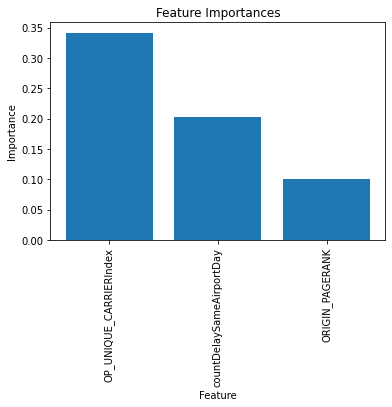

In [0]:
plt.bar(range(1, 4), df_imp['imp'].tolist()[:3], orientation = 'vertical')
plt.xticks(range(1,4), df_imp['feat'].tolist()[:3], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')


Out[70]: Text(0.5, 1.0, 'Feature Importances')

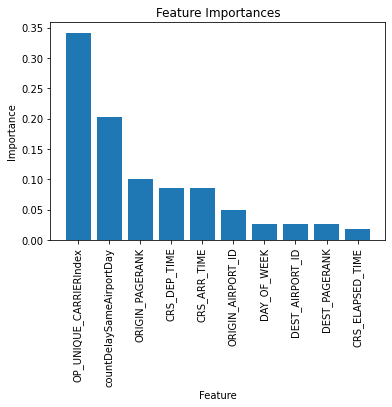

In [0]:
plt.bar(range(1, 11), df_imp['imp'].tolist()[:10], orientation = 'vertical')
plt.xticks(range(1,11), df_imp['feat'].tolist()[:10], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')
